In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [9]:
nodes = np.linspace(10,100,10)
radii = np.linspace(0,1.35,21)

X, Y = np.meshgrid(nodes,radii)
print(nodes,radii,X,Y)
print(X.shape)
print(Y.shape)

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.] [0.     0.0675 0.135  0.2025 0.27   0.3375 0.405  0.4725 0.54   0.6075
 0.675  0.7425 0.81   0.8775 0.945  1.0125 1.08   1.1475 1.215  1.2825
 1.35  ] [[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [

In [10]:
os.chdir('..')

In [4]:
import os, sys
from importlib import reload
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
import ep_finder, lep_finder, graphs, ep_utils

In [63]:
reload(graphs)

ModuleNotFoundError: spec not found for the module 'graphs'

In [64]:
graph = nx.random_geometric_graph(200,.1)

In [65]:
relabeledGraph = graphs.relabel(graph)

In [66]:
ep_dict, lep_dict, coasestAndLocal = ep_utils.getEquitablePartitions(relabeledGraph,progress_bars=False)
nontrivEp_dict, nontrivLep_list,hist_list,perc = graphs.NontrivialityData(relabeledGraph,ep_dict,lep_dict,return_vals=True,plot=False,show_progress=True,verbose=True)


Nontrivial nodes progress:21/22
Total percentage on nontrivial nodes: 0.25
Total pairs in partition elements: 16
Percentage of nontrivial nodes in pairs: 0.64


In [15]:
percent_non_trivial = np.zeros((21, 10))
for _ in range(5):
    for i, rad in enumerate(radii):
    #     clear_output()
        print("\r" + str(rad), end="")
        for j, nod in enumerate(nodes):
            graph = graphs.relabel(nx.random_geometric_graph(int(nod), rad))
            ep_dict, lep_dict, coasestAndLocal = ep_utils.getEquitablePartitions(graph,progress_bars=False)
            _,_,_,percent_non_trivial[i][j] += graphs.NontrivialityData(graph,ep_dict,lep_dict,return_vals=True,plot=False,show_progress=False,verbose=False)
for i in range(len(percent_non_trivial))
    for j in range(len(percent_non_trivial))
        percent_non_trivial[i][j] /= 5

SyntaxError: 'tuple' is an illegal expression for augmented assignment (1454091353.py, line 9)

In [13]:
#percent_non_trivial

<IPython.core.display.Javascript object>


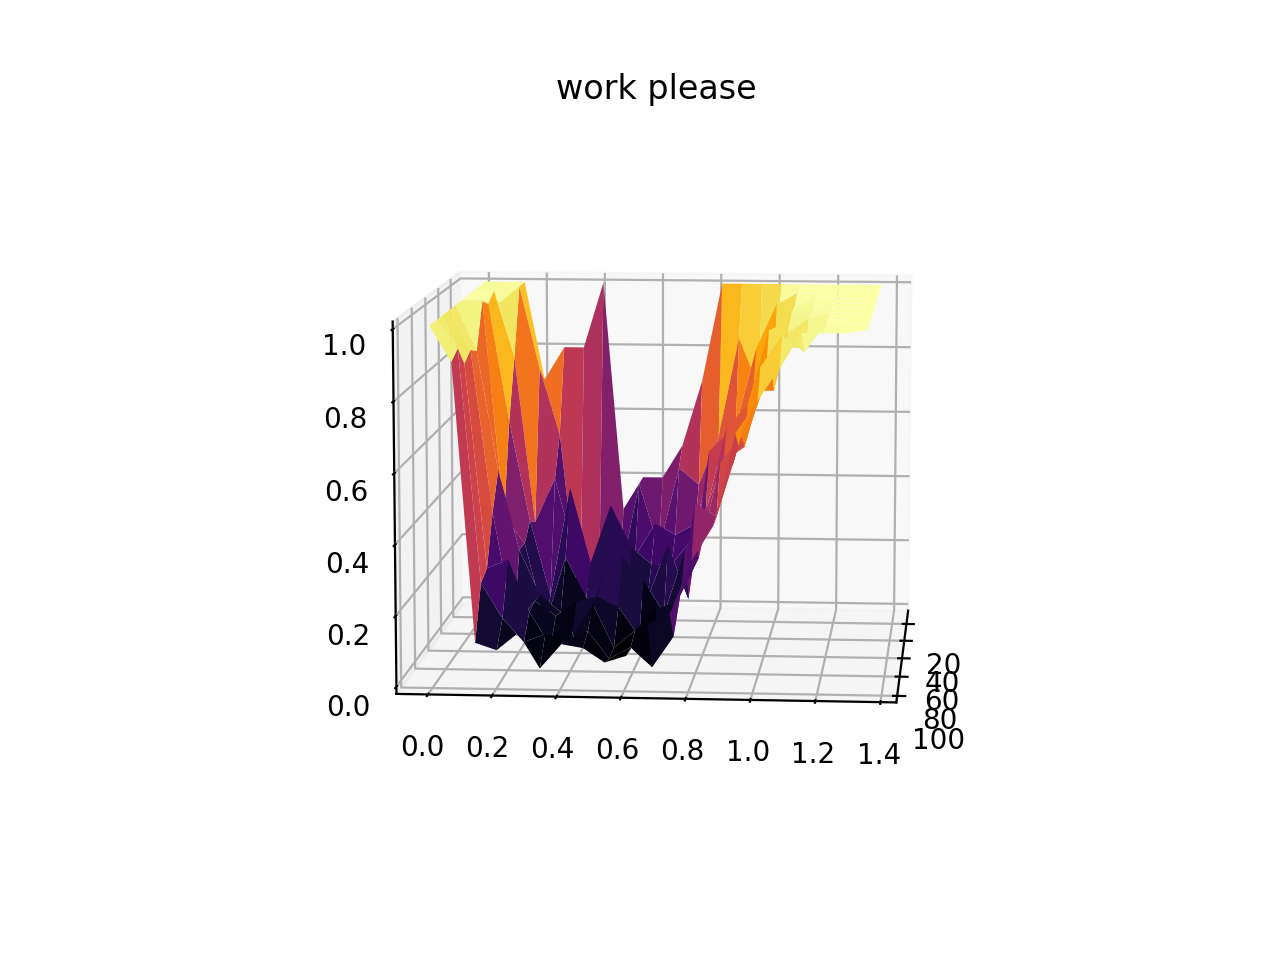

In [16]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,percent_non_trivial,cmap='inferno')
plt.title("work please")
plt.show()